
## PROJECT NAME :Smart lender applicant credibility prediction for loan approval
## Team member 01 : THARANI M
## Team member 02 : VIJAYARAVINTHAN N
## Team member 03 : VYSHAK VASUDEVAN NAIR V
## Team member 04 : PREETHA M


---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='IZCRpCRj0yKmbKQd8iREmvXh56SIXH9n-RyrAxCgR92t',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'loanpredictiondeployment-donotdelete-pr-manmrk26qrr6go'
object_key = 'loan_prediction.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()
 
data=data.rename(columns={'Self_Employed':'Employment','Married':'Marital_Status'})
data.drop(columns=['Loan_ID'],inplace=True)
data.head()

,Gender,Marital_Status,Dependents,Education,Employment,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.Gender.fillna(data.Gender.mode()[0],inplace=True)
data.Marital_Status.fillna(data.Marital_Status.mode()[0],inplace=True)
data.Dependents.fillna(data.Dependents.mode()[0],inplace=True)
data.Employment.fillna(data.Employment.mode()[0],inplace=True)
data.LoanAmount.fillna(value=data.LoanAmount.median(),inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.median(),inplace=True)
data.Credit_History.fillna(data.Credit_History.mode()[0],inplace=True)

In [5]:
data.isna().sum()

Gender               0
Marital_Status       0
Dependents           0
Education            0
Employment           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term'>

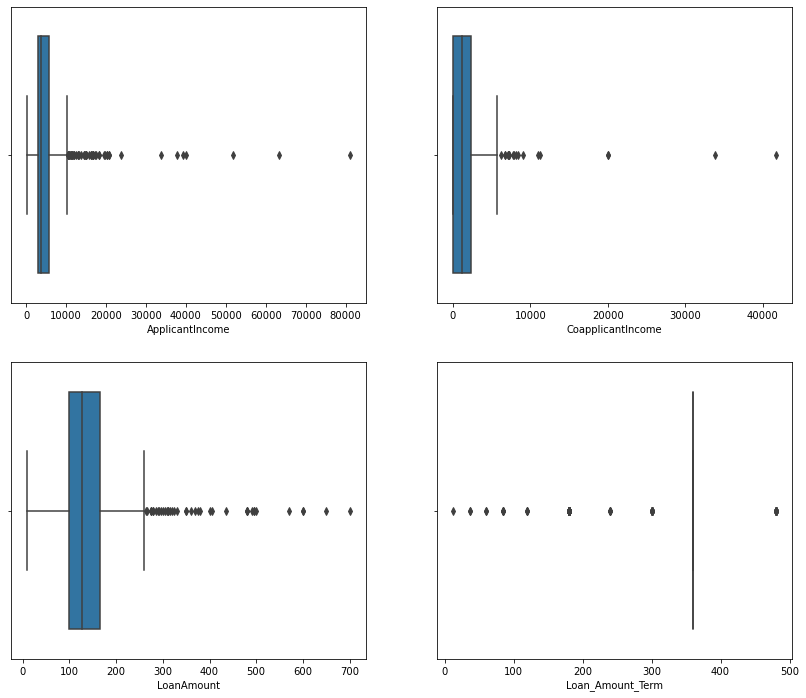

In [6]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.boxplot(data=data,x='ApplicantIncome')
plt.subplot(2,2,2)
sns.boxplot(data=data,x='CoapplicantIncome')
plt.subplot(2,2,3)
sns.boxplot(data=data,x='LoanAmount')
plt.subplot(2,2,4)
sns.boxplot(data=data,x='Loan_Amount_Term')

<AxesSubplot:xlabel='ApplicantIncome'>

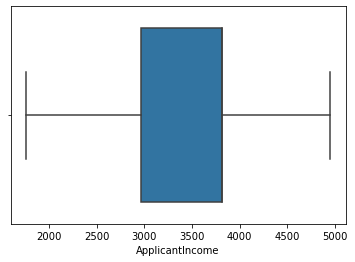

In [7]:
q1=data.ApplicantIncome.quantile(0.27)
q3=data.ApplicantIncome.quantile(0.49)
IQR=q3-q1
upper_lim=q3 + 1.5 * IQR
lower_lim=q1 -1.5 * IQR
data.ApplicantIncome=np.where(data.ApplicantIncome > upper_lim,data.ApplicantIncome.median(),data.ApplicantIncome)
data.ApplicantIncome=np.where(data.ApplicantIncome < lower_lim,data.ApplicantIncome.median(),data.ApplicantIncome)
sns.boxplot(data=data,x='ApplicantIncome')

<AxesSubplot:xlabel='CoapplicantIncome'>

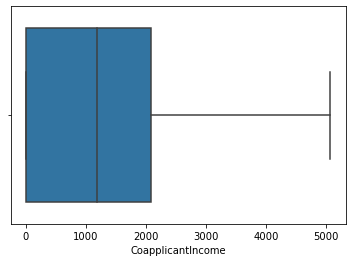

In [8]:
q1=data.CoapplicantIncome.quantile(0.25)
q3=data.CoapplicantIncome.quantile(0.71)
IQR=q3-q1
upper_lim=q3 + 1.5 * IQR
data.CoapplicantIncome=np.where(data.CoapplicantIncome > upper_lim,data.CoapplicantIncome.median(),data.CoapplicantIncome)
sns.boxplot(data=data,x='CoapplicantIncome')

<AxesSubplot:xlabel='LoanAmount'>

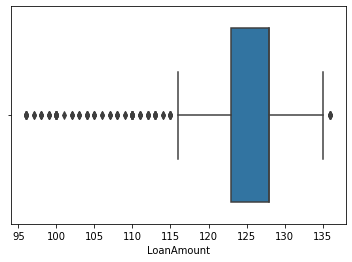

In [9]:
q1=data.LoanAmount.quantile(0.20)
q3=data.LoanAmount.quantile(0.60)
data.LoanAmount=np.where(data.LoanAmount > q3,data.LoanAmount.median(),data.LoanAmount)
data.LoanAmount=np.where(data.LoanAmount < q1,data.LoanAmount.median(),data.LoanAmount)
sns.boxplot(data=data,x='LoanAmount')

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data.Marital_Status=le.fit_transform(data.Marital_Status)
data.Dependents=le.fit_transform(data.Dependents)
data.Education=le.fit_transform(data.Education)
data.Employment=le.fit_transform(data.Employment)
data.Property_Area=le.fit_transform(data.Property_Area)
data.Loan_Status=le.fit_transform(data.Loan_Status)

In [11]:
x=data.drop(columns=['Loan_Status'])
y=data.Loan_Status
from sklearn.preprocessing import scale
x_scaled=pd.DataFrame(scale(x),columns=x.columns)
x_scaled.head()

,Gender,Marital_Status,Dependents,Education,Employment,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.491775,-0.912834,0.476889,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.559202,0.219569,0.476889,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.633838,-0.912834,0.476889,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-1.211537,0.857860,-0.396193,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.491775,-0.912834,0.476889,0.273231,0.411733,1.223298


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=3)
train_test_shape={'x_train':x_train.shape,'x_test':x_test.shape,'y_train':y_train.shape,'y_test':y_test.shape}
pd.Series(train_test_shape)

x_train    (429, 11)
x_test     (185, 11)
y_train       (429,)
y_test        (185,)
dtype: object

## Application of ML models

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,precision_score,classification_report

In [14]:
y_train=y_train.map({1:'Y',0:'N'})
y_test=y_test.map({1:'Y',0:'N'})

## 1. Decision Tree Classification Algorithm

In [15]:
d_tree_cls=DecisionTreeClassifier(criterion="entropy",random_state=12,max_depth=2,min_samples_leaf=10)
d_tree_cls.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10,
                       random_state=12)

In [16]:
y_predict_dtree_train=d_tree_cls.predict(x_train)
y_predict_dtree_train

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [17]:
y_predict_dtree=d_tree_cls.predict(x_test)
y_predict_dtree

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N

In [18]:
dtree_train_acc_score=accuracy_score(y_train,y_predict_dtree_train)*100
dtree_test_acc_score=accuracy_score(y_test,y_predict_dtree)*100
print("Training Accuracy Score: {}\nTraining Accuracy Score: {}".format(dtree_train_acc_score,dtree_test_acc_score))

Training Accuracy Score: 79.02097902097903
Training Accuracy Score: 85.4054054054054


In [19]:
pd.crosstab(y_test,y_predict_dtree)

col_0,N,Y
Loan_Status,,
N,21,24
Y,3,137


In [20]:
dtree_cls_report=classification_report(y_test,y_predict_dtree)
print(dtree_cls_report)

              precision    recall  f1-score   support

           N       0.88      0.47      0.61        45
           Y       0.85      0.98      0.91       140

    accuracy                           0.85       185
   macro avg       0.86      0.72      0.76       185
weighted avg       0.86      0.85      0.84       185



## Random Forest Classification Algorithm

In [21]:
rf_cls=RandomForestClassifier(n_estimators=100,random_state=5,max_depth=6)
rf_cls.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, random_state=5)

In [22]:
y_rf_train_predict=rf_cls.predict(x_train)
y_rf_train_predict

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [23]:
y_rf_test_predict=rf_cls.predict(x_test)
y_rf_test_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N

In [24]:
rf_train_acc_score = accuracy_score(y_train,y_rf_train_predict)*100
rf_test_acc_score = accuracy_score(y_test,y_rf_test_predict)*100
print("Training Accuracy Score: {}\nTraining Accuracy Score: {}".format(rf_train_acc_score,rf_test_acc_score))

Training Accuracy Score: 81.81818181818183
Training Accuracy Score: 84.86486486486487


In [25]:
pd.crosstab(y_test,y_rf_test_predict)

col_0,N,Y
Loan_Status,,
N,21,24
Y,4,136


In [26]:
print(classification_report(y_test,y_rf_test_predict))

              precision    recall  f1-score   support

           N       0.84      0.47      0.60        45
           Y       0.85      0.97      0.91       140

    accuracy                           0.85       185
   macro avg       0.84      0.72      0.75       185
weighted avg       0.85      0.85      0.83       185



## KNN Classification Algorithm

In [27]:
knn_cls=KNeighborsClassifier(n_neighbors=12,p=2,metric='euclidean')
knn_cls.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [28]:
y_train_knn_predict=knn_cls.predict(x_train)
y_train_knn_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [29]:
y_test_knn_predict=knn_cls.predict(x_test)
y_test_knn_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N

In [30]:
knn_train_acc_score=accuracy_score(y_train,y_train_knn_predict)*100
knn_test_acc_score=accuracy_score(y_test,y_test_knn_predict)*100
print("Training Accuracy Score: {}\nTraining Accuracy Score: {}".format(knn_train_acc_score,knn_test_acc_score))

Training Accuracy Score: 79.48717948717949
Training Accuracy Score: 83.24324324324324


## Xgboost Classification Algorithm

In [31]:
y_train=y_train.map({'Y':1,'N':0})
y_test=y_test.map({'Y':1,'N':0})
y_train.value_counts(),y_test.value_counts()

(1    282
 0    147
 Name: Loan_Status, dtype: int64,
 1    140
 0     45
 Name: Loan_Status, dtype: int64)

In [ ]:
xgBoost_cls = xgb.XGBClassifier(objective='binary:logistic',seed=42,random_state=6,max_depth=7)
model=xgBoost_cls.fit(x_train,
                y_train,
                verbose=True,
                early_stopping_rounds=10,
                eval_metric='aucpr',
                eval_set=[(x_test,y_test)])

In [ ]:
y_pred_xgb_train=model.predict(x_train)
y_pred_xgb_train

In [ ]:
y_pred_xgb=xgBoost_cls.predict(x_test)
y_pred_xgb

In [38]:
Xgboost_train__acc_score=accuracy_score(y_train,y_pred_xgb_train)*100
Xgboost_test_acc_score=accuracy_score(y_test,y_pred_xgb)*100
print("Training Accuracy Score: {}\nTraining Accuracy Score: {}".format(Xgboost_train__acc_score,Xgboost_test_acc_score))

NameError: name 'y_pred_xgb_train' is not defined

pd.crosstab(y_test,y_pred_xgb)

In [ ]:
metrics={
    'Algorithm Name':['Decision Tree Algo','Random Forest Algo','KNN Algo','XgBoost Algo',],
    'Training Accuracy Score':[dtree_train_acc_score,rf_train_acc_score,knn_train_acc_score,Xgboost_train__acc_score],
    'Testing Accuracy Score':[dtree_test_acc_score,rf_test_acc_score,knn_test_acc_score,Xgboost_test_acc_score],
    }
pd.DataFrame(metrics)

Random forest performs well in terms of all metrics of classification algorithm
So we can use this model to implement flask application

In [33]:
!pip install ibm_watson_machine_learning

In [34]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url": "https://us-south.ml.cloud.ibm.com",
                    "apikey":"OysgnKVWfNzTP00F8xw24CfxzTQg5hTrG1ukEtbuF8_V"
                }
client = APIClient(wml_credentials)

In [35]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [36]:
space_uid = guid_from_space_name(client,'models')
print("Space UID = "+ space_uid)

Space UID = dadcc5e9-47e2-42f7-8f29-989753128359


In [37]:
client.set.default_space(space_uid)

'SUCCESS'

In [38]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [39]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [42]:
model_details = client.repository.store_model(model=rf_cls,meta_props={
client.repository.ModelMetaNames.NAME:"loan_prediction",
client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid }
                                             )
get_model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [41]:
model_id

'b40d0c63-bb0a-418a-8060-e3af0415d5ef'

---
Successfully finished deployment creation, deployment_uid = "12b83a17-24d8-5082-900f-0ab31fbfd3cb"
---